<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Unit 3 Project: Supervised Learning

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

In this project, you will practice the core skill of this course: supervised learning with passively collected, tabular, cross-sectional data. We will start with a regression problem, and then address a classification problem.

## Regression

In [3]:
# Load the dataset
noise = pd.read_csv(
    'data/airfoil_self_noise.dat',
    delimiter='\t',
    names=['frequency',
           'angle',
           'chord_length',
           'free_stream_velocity',
           'displacement_thickness',
           'self_noise',
          ]
)

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

This data set represents the noise or sound pressure (captured in decibels) generated for a given airfoil at various conditions.  This could be useful when attempting to design aircraft to improve noise reduction (with the cabin) or to perhaps identify noises that may indicate probelms with airfoils in flight.

- Find out how many rows and columns are in `noise`.

In [8]:
rows,columns = noise.shape
print("Rows: ",rows,", Columns: ", columns)

Rows:  1503 , Columns:  6


- Find out what data types are present.

In [9]:
noise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
frequency                 1503 non-null int64
angle                     1503 non-null float64
chord_length              1503 non-null float64
free_stream_velocity      1503 non-null float64
displacement_thickness    1503 non-null float64
self_noise                1503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


- Find out how many null values there are in each columns.

In [11]:
noise.isna().sum()

frequency                 0
angle                     0
chord_length              0
free_stream_velocity      0
displacement_thickness    0
self_noise                0
dtype: int64

- Check basic summary statistics for each column, including at least one measure of central tendency and one measure of dispersion.

In [10]:
noise.describe()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

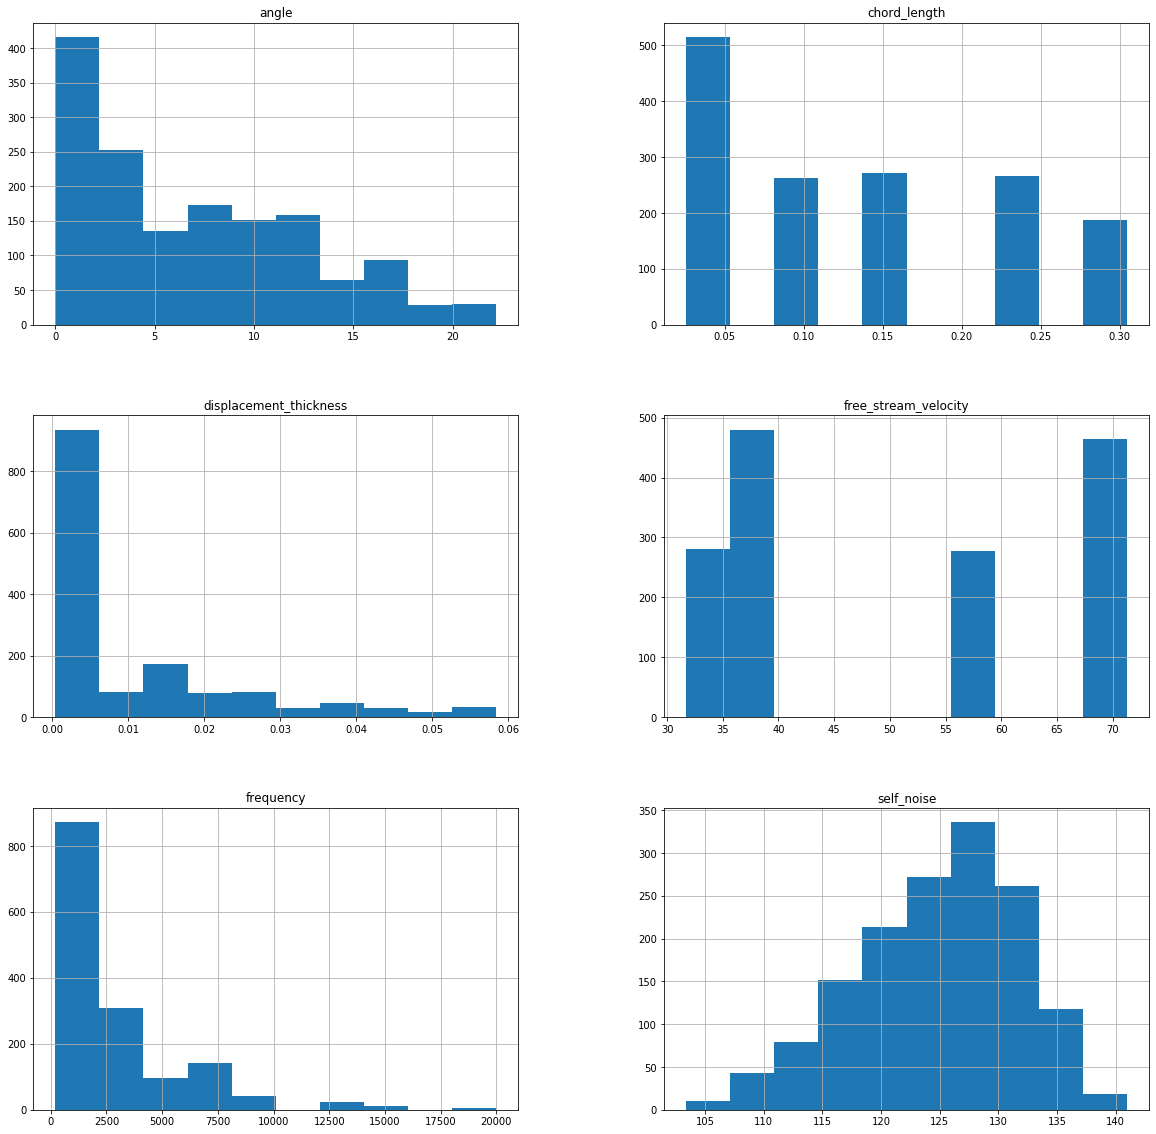

In [14]:
ax3 = noise.hist(figsize=(20,20), bins = 10) # Visualize distributions of each column

- Which variables are approximately normally distributed?

- Which variables show strong skew?

- Make a scatterplot of each feature variable with the target variable "self_noise".

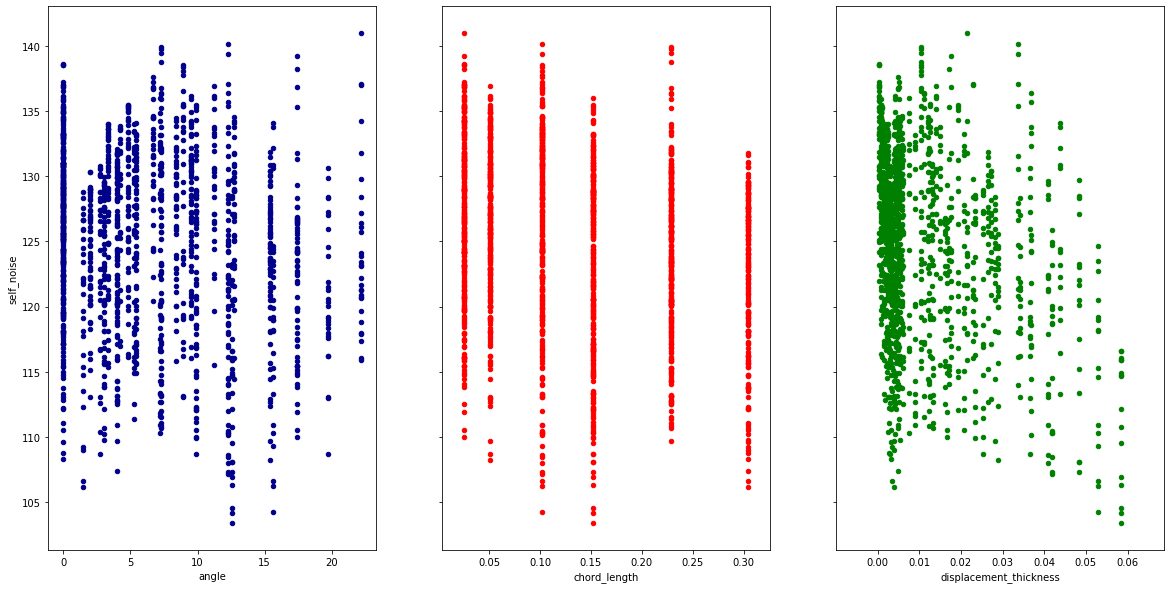

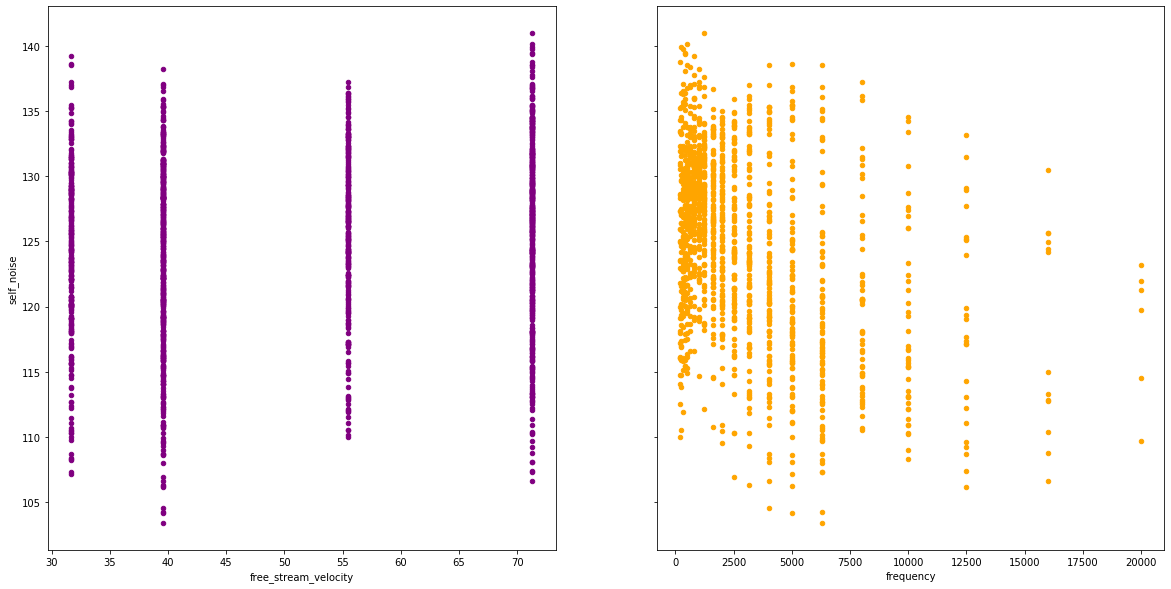

In [35]:
fig, (ax, ax2, ax3) = plt.subplots(nrows=1, ncols=3,  sharey=True, figsize=(20, 10))
fig, (ax4, ax5) = plt.subplots(nrows=1, ncols=2,  sharey=True, figsize=(20, 10))

noise.plot.scatter(x='angle',y='self_noise',c="DarkBlue", ax=ax)
noise.plot.scatter(x='chord_length',y='self_noise',c="Red", ax=ax2)
noise.plot.scatter(x='displacement_thickness',y='self_noise',c="Green", ax=ax3)
noise.plot.scatter(x='free_stream_velocity',y='self_noise',c="Purple", ax=ax4)
noise.plot.scatter(x='frequency',y='self_noise',c="Orange", ax=ax5)


- Make a heatmap of the correlation matrix for this dataset. Be sure to use an appropriate colormap!

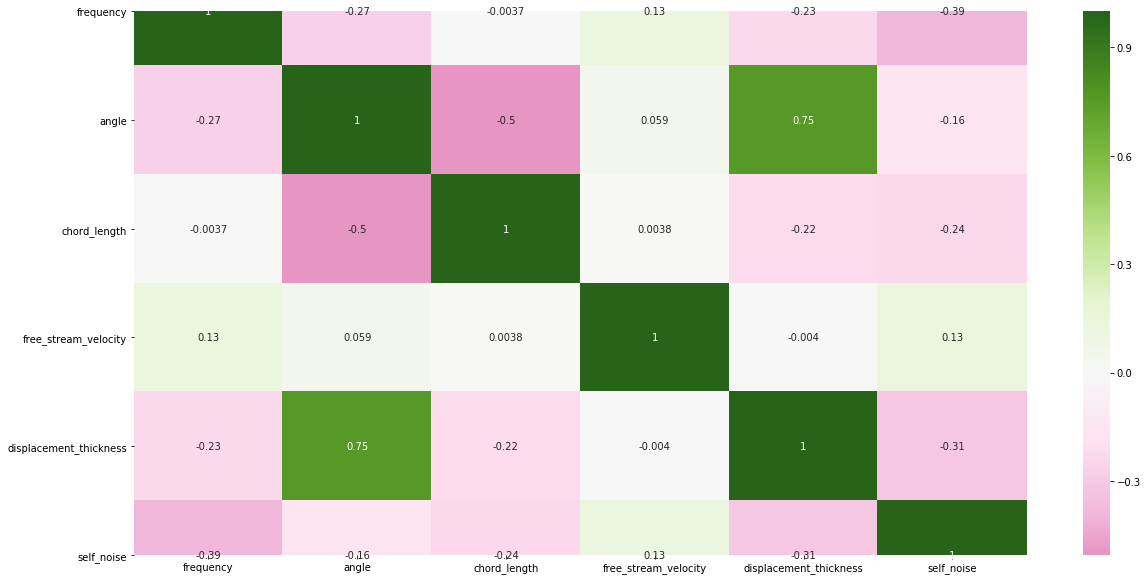

In [33]:
import seaborn as sns

fig, ax5 = plt.subplots(figsize=(20,10)) 
sns.heatmap(noise.corr(), center=0, cmap="PiYG", annot = True, ax = ax5);

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

- Develop a linear regression model to predict the target variable "self_noise". Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

feature_cols = ['frequency','chord_length','angle','free_stream_velocity','displacement_thickness']
target_col = ['self_noise']

# Create feature and target dataframes
X = noise.loc[:, feature_cols]
y = noise.loc[:, target_col]

# Splitting both target and features data into a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, train_size=.70, random_state = 23)

# Creating a linear regression model instance and fitting the training data to it
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluating the model 
print('Training Data R-Squared:', lr.score(X_train, y_train)) # Comparing training data to null model/finding R-Squared 
print('Test Data R-Squared:', lr.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 

y_pred = lr.predict(X_test)
print('Test Data RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Finding RMSE
print ('Test Data MAE:', metrics.mean_absolute_error(y_test, y_pred))         # Finding MAE



Training Data R-Squared: 0.5085283628341207
Test Data R-Squared: 0.5286498626950435
Test Data RMSE: 4.702084791701504
Test Data MAE: 3.5913800525442006


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [48]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
y_train_array = np.array(y_train['self_noise'])
rf.fit(X_train, y_train_array)

y_test_array = np.array(y_test['self_noise'])
print('Training Data R-Squared:', rf.score(X_train, y_train_array))
print('Training Data R-Squared:', rf.score(X_test, y_test_array))


Training Data R-Squared: 0.9891529924489763
Training Data R-Squared: 0.9243182191962751


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

- **BONUS:** Keep going! Find ways to make your model better.

## Classification

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Credit+Approval). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

In [ ]:
# Load the dataset
credit = pd.read_csv(
    'data/crx.data',
    names=range(1, 17)
)

- Find out how many rows and columns are in `credit`.

- Find out what data types are present.

- Columns 2 and 14 are "object" but are listed as "continuous" in the dataset description. Tranform these columns to have the appropriate data type. You will need to deal with the special character "?"

- Find out how many null values there are in each columns.

- Check basic summary information for each column, including categorical columns.

- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

- Which variables are approximately normally distributed?

- Which variables show strong skew?

- Make a scatterplot of each feature variable with the target variable (`16`).

- Make a heatmap of the correlation matrix for numeric variables in this dataset. Be sure to use an appropriate colormap!

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

- What is the accuracy of a null model that just predicts the most common outcome each time on this dataset?

- Develop a logistic regression model to predict the target variable `16`. Train it on 70% of the data. Gets its accuracy score on both that 70% and the other 30%. Use dummy-coding on categorical columns. Otherwise, at this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

- **BONUS:** Keep going! Find ways to make your model better.